# Introduction
Kaggle is open source data science community, which has code, tools, compititions, data sets etc. It has many ongoing active compositions, we can submit a trained model to participate in the compitition. It is owned by google. We can use the kaggle API to directly communicate with it from programming. To use the API we need to create a new token on kaggle at Settings->Account->API->Create New Token, this downloads a token file called kaggle.json on your local machine. We need this token to use the kaggle API from your application. To participate in a compitition, we have to go inside the compition and click understand and accept in the rules tab.

In [1]:
# To detectly download the data from kaggle, import kaggle first
# This will not work without kaggle.json token file, placed at the right loaction
# We need to upload kaggle.json to Colab and move it to location /root/.kaggle/ (since Colob is on Linux)
# import kaggle

# Then to directly download the data set from kaggle, go to the compitition on kaggle, in the data tab, 
# copy the API command to download the data. 
# For dogs vs cats compitition this command is - kaggle competitions download -c dogs-vs-cats
# Run this to download - 
#!kaggle competitions download -c dogs-vs-cats 

# This is the procedure on Colab, below is the procedure to make it work on jupyter windows

In [2]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77734 sha256=9e33d49d13ea26a979c9acbfd2f335f456db6f925f0437f522b148229ab38774
  Stored in directory: c:\users\rdharmana_adm\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


In [4]:
# To import kaggle kaggle.json should be at C:\Users\rdharmana_adm\.kaggle
import kaggle

In [6]:
# Probably same command as Colab to download from kaggle
# !kaggle competitions download -c dogs-vs-cats

In [ ]:
# For this model we downloaded the data from kaggle web site
# unzip the downloaded zip file, it has 3 files
# test1.zip - test data to test the trained model on, to submit the model for the compitition
# train.zip - train data, unzip it, it has 25000 images of dogs and cats
# sampleSubmission.csv - 

In [1]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(397, 500, 3)
(499, 403, 3)


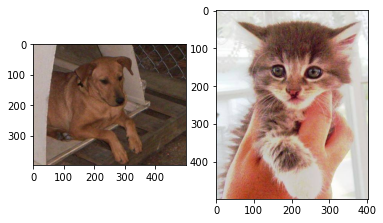

In [2]:
# Read one dog and one cat randomly train folder
image_sample_dog = cv2.imread("train/dog.100.jpg")
image_sample_dog = cv2.cvtColor(image_sample_dog, cv2.COLOR_BGR2RGB)
image_sample_cat = cv2.imread("train/cat.100.jpg")
image_sample_cat = cv2.cvtColor(image_sample_cat, cv2.COLOR_BGR2RGB)

# Display them
plt.subplot(1, 2, 1)
plt.imshow(image_sample_dog)
plt.subplot(1, 2, 2)
plt.imshow(image_sample_cat)

# Print their shapes
print(image_sample_dog.shape)
print(image_sample_cat.shape)

# From these shapes, we can say that all the images are 3 channel images but with different heights and widths
# Hence we have to resize the images to the same size, probably take average height and width
# For this model we will resize all images to size 150 X 150

In [3]:
# For this competition, labels are in image names
# We need to make x_train array which contains all the images and y_train array which contains 
# all the labels from the train folder
import os

x_train = []
y_train = []
file_names = os.listdir("train") #Get the list of files in the train folder
for file_name in file_names: # loop through all image file names in train directory
    image = cv2.imread("train/" + file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150,150)) # resize to 150 X 150
    x_train.append(image)
    if "cat" in file_name:
        y_train.append(0)
    else:
        y_train.append(1)

In [4]:
# Convert the tain lists into arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train.shape

(25000,)

In [5]:
# shapes
print(x_train.shape) # number of images X width X height X channels
print(y_train.shape) # number of image labels

# Some ways to check if all the given images are valid - images can be read by cv2, 
# check all the image shapes and that they can be pre processed,
# color contouring - many ways to do it - one way is to take a average of RGB of each pixcel, and make a hostogram
# from these average values, then calculate the std for each image and compare them to find anamalies

(25000, 150, 150, 3)
(25000,)


dog


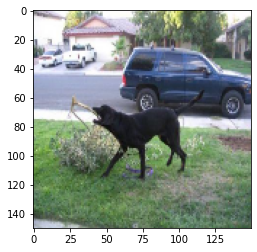

In [6]:
categories = ["cat", "dog"]
num = 13008
plt.imshow(x_train[num])
print(categories[y_train[num]])

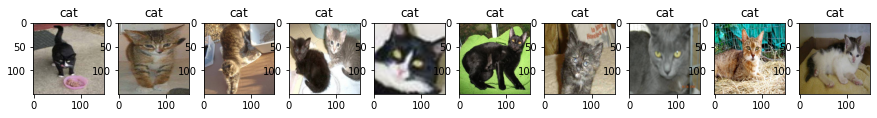

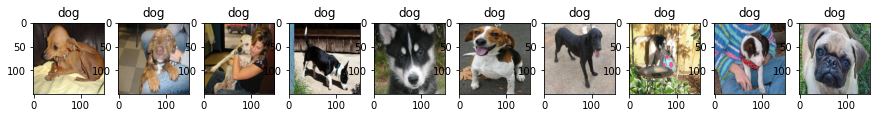

In [7]:
num_of_images = 10
categories_len = len(categories)

for category in range(categories_len):
    indexes = np.random.choice(np.where(y_train == category)[0], num_of_images)
    plt.figure(figsize=(15,15))
    for col in range(num_of_images):
        plt.subplot(categories_len, num_of_images, col+1)
        plt.imshow(x_train[indexes[col]])
        plt.title(categories[category])
    plt.show()

In [17]:
# Modelling
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [18]:
# split the data to train and test
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_train, y_train, test_size=0.1)

In [19]:
x_train_.shape, y_train_.shape

((22500, 150, 150, 3), (22500,))

In [20]:
x_test_.shape, y_test_.shape

((2500, 150, 150, 3), (2500,))

In [21]:
# Pre Processing
# This may crash the RAM, because
# - lots of computations, each picxel RGB values are divided by 255.0
# - since floating point, needs a lot of memory to convert and store
# - alll the data is in RAM, hence might crash
# Solution is to use generators, with generators we don't need to read all images at the same time
# Images are read in batches as they are needed while the running the model
# Model execution time will increase, but we can use any number of images for the model
x_train_ = x_train_/255.0
y_train_ = tf.keras.utils.to_categorical(y_train_)

In [22]:
#del model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150, 150, 3), name="Input"))
model.add(tf.keras.layers.Flatten(name="Flatten"))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu, name="Hidden"))
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax, name="Output"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 67500)             0         
                                                                 
 Hidden (Dense)              (None, 128)               8640128   
                                                                 
 Output (Dense)              (None, 2)                 258       
                                                                 
Total params: 8,640,386
Trainable params: 8,640,386
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.categorical_crossentropy, metrics=["acc"])

In [24]:
x_train_.shape

(22500, 150, 150, 3)

In [25]:
model.fit(x=x_train_, y=y_train_, epochs=10, batch_size=16, validation_split=0.7)

Epoch 1/10
422/422 [==============================] - 69s 162ms/step - loss: 0.7955 - acc: 0.5213 - val_loss: 0.6831 - val_acc: 0.5800
Epoch 2/10
422/422 [==============================] - 21s 51ms/step - loss: 0.6808 - acc: 0.5707 - val_loss: 0.6702 - val_acc: 0.5861
Epoch 3/10
422/422 [==============================] - 19s 45ms/step - loss: 0.6702 - acc: 0.5930 - val_loss: 0.6590 - val_acc: 0.5995
Epoch 4/10
422/422 [==============================] - 18s 42ms/step - loss: 0.6615 - acc: 0.6012 - val_loss: 0.6545 - val_acc: 0.6074
Epoch 5/10
422/422 [==============================] - 18s 42ms/step - loss: 0.6561 - acc: 0.6133 - val_loss: 0.6663 - val_acc: 0.5895
Epoch 6/10
422/422 [==============================] - 18s 42ms/step - loss: 0.6495 - acc: 0.6241 - val_loss: 0.6582 - val_acc: 0.6098
Epoch 7/10
422/422 [==============================] - 18s 44ms/step - loss: 0.6441 - acc: 0.6273 - val_loss: 0.6634 - val_acc: 0.6074
Epoch 8/10
422/422 [==============================] - 19s 46m

In [26]:
# Save to model to the given folder
model.save("dogvscatmodel")

INFO:tensorflow:Assets written to: dogvscatmodel\assets


INFO:tensorflow:Assets written to: dogvscatmodel\assets
